## 🛠️ Step 1: Import Necessary Libraries

In this step, we import the essential libraries required for data processing, visualization, and Market Basket Analysis using the Apriori algorithm.


In [1]:
try:
	print('------ Initiating Imports ------')
	import pandas as pd
	import matplotlib.pyplot as plt
	import seaborn as sns
	from mlxtend.frequent_patterns import apriori, association_rules
	from mlxtend.preprocessing import TransactionEncoder
except ModuleNotFoundError as mnfe:
	print(f'Error: {mnfe}. Please ensure the module is installed or the path is corretly configured.')
else:
	print("Success: All required ML modules imported.")
finally:
	print('------ Imports Completed ------')

------ Initiating Imports ------
Success: All required ML modules imported.
------ Imports Completed ------


---

## 📥 Step 2: Load the Dataset

We load the dataset into a pandas DataFrame and inspect its structure.


In [2]:
try:
	print('------ File Reading Initiated ------')
	data = pd.read_csv('../Data/GroceryTDS.csv', header=None) # get the content of GroceryTDS (grocery transaction dataset)
except FileNotFoundError as fnfe:
	print(f'Error: {fnfe}. Please ensure the file is uploaded and path is configured correctly.')
else:
	print("Success: Contents of the CSV file were read.")
finally:
	print('------ File Reading Completed ------')

------ File Reading Initiated ------
Success: Contents of the CSV file were read.
------ File Reading Completed ------


---

## 🔍 Step 3: Exploratory Data Analysis (EDA)

Let's explore the dataset to understand the distribution of transactions and identify patterns in the item purchases.


In [3]:
if 0 in data.columns:
	data.drop([0], inplace=True, axis=1) # drop the column (axis=1) as it is a redundant column that has row numbers
data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()
print()
data.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       7501 non-null   object
 1   2       5747 non-null   object
 2   3       4389 non-null   object
 3   4       3345 non-null   object
 4   5       2529 non-null   object
 5   6       1864 non-null   object
 6   7       1369 non-null   object
 7   8       981 non-null    object
 8   9       654 non-null    object
 9   10      395 non-null    object
 10  11      256 non-null    object
 11  12      154 non-null    object
 12  13      87 non-null     object
 13  14      47 non-null     object
 14  15      25 non-null     object
 15  16      8 non-null      object
 16  17      4 non-null      object
 17  18      4 non-null      object
 18  19      3 non-null      object
 19  20      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB



,count,unique,top,freq
1,7501,115,mineral water,577
2,5747,117,mineral water,484
3,4389,115,mineral water,375
4,3345,114,mineral water,201
5,2529,110,green tea,153
6,1864,106,french fries,107
7,1369,102,green tea,96
8,981,97,green tea,67
9,654,88,green tea,57
10,395,80,green tea,31


In [5]:
data = data.apply(lambda row: row.dropna().astype(str).tolist(), axis=1) # transform each row into a list of non-null items (strings), preparing data for Apriori

data = pd.DataFrame({'Items': data})
data

,Items
0,"[shrimp, almonds, avocado, vegetables mix, gre..."
1,"[burgers, meatballs, eggs]"
2,[chutney]
3,"[turkey, avocado]"
4,"[mineral water, milk, energy bar, whole wheat ..."
...,...
7496,"[butter, light mayo, fresh bread]"
7497,"[burgers, frozen vegetables, eggs, french frie..."
7498,[chicken]
7499,"[escalope, green tea]"


In [6]:
data['count'] = data['Items'].apply(len) # get the length of each transation in a new column 'count'
data

,Items,count
0,"[shrimp, almonds, avocado, vegetables mix, gre...",20
1,"[burgers, meatballs, eggs]",3
2,[chutney],1
3,"[turkey, avocado]",2
4,"[mineral water, milk, energy bar, whole wheat ...",5
...,...,...
7496,"[butter, light mayo, fresh bread]",3
7497,"[burgers, frozen vegetables, eggs, french frie...",6
7498,[chicken],1
7499,"[escalope, green tea]",2


In [7]:
data['count'].describe()

count    7501.000000
mean        3.914545
std         2.905540
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        20.000000
Name: count, dtype: float64

## 📊 Step 4: Item Frequency Visualization

Here we display the distribution of the items bought by customers.

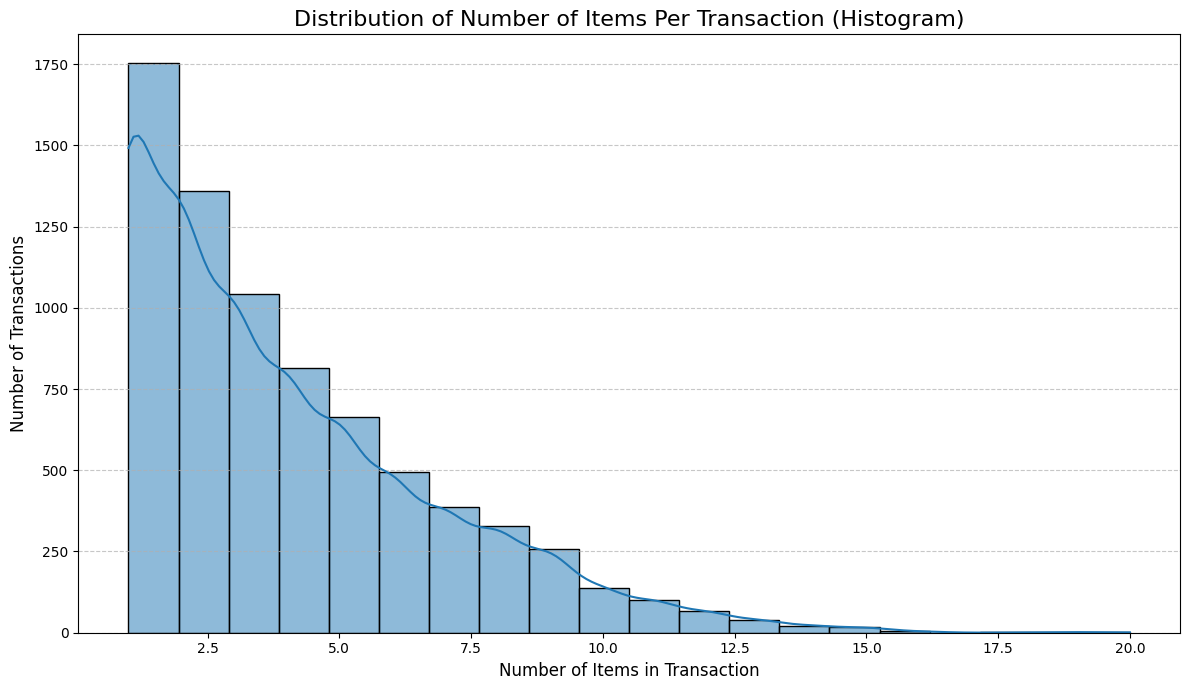

In [8]:
plt.figure(figsize=(12, 7))
sns.histplot(data['count'], bins=20, kde=True) # bins for number of bars, kde for density curve

plt.title('Distribution of Number of Items Per Transaction (Histogram)', fontsize=16)
plt.xlabel('Number of Items in Transaction', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) # Grid on y-axis for frequency
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

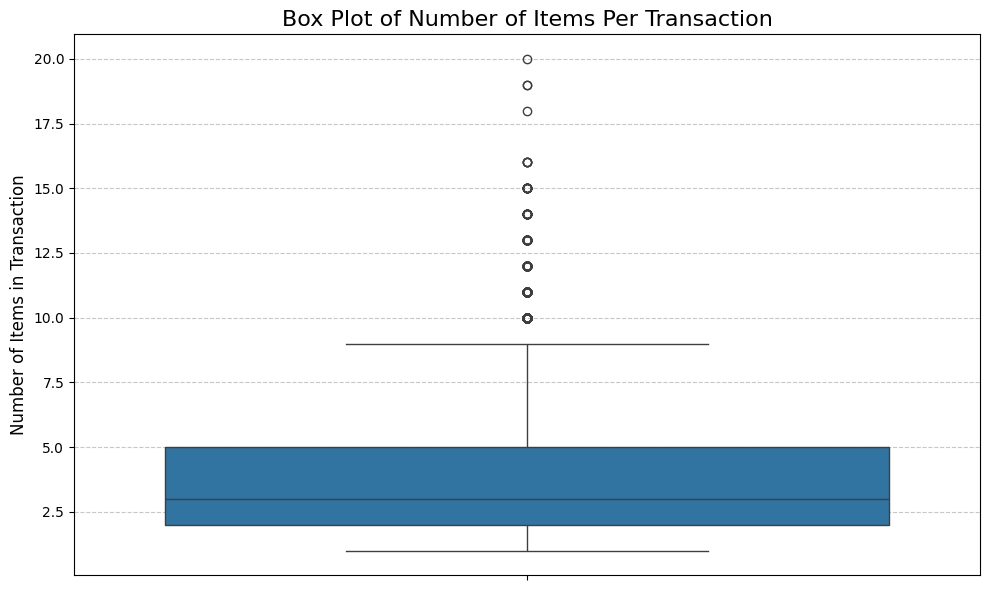

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['count']) # Box plot is usually vertical for single variable

plt.title('Box Plot of Number of Items Per Transaction', fontsize=16)
plt.ylabel('Number of Items in Transaction', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

---

## 🧩 Step 5a: Preprocessing for Market Basket Analysis

We deal with outliers using and dealing with singleton transaction.


In [10]:
data = data[data['count'] >= 2]

In [11]:
Q1 = data['count'].quantile(0.25)
Q3 = data['count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Q3 - Q1): {IQR}")
print(f"Lower Bound (Q1 - 1.5 * IQR): {lower_bound} ~ {round(lower_bound, 0)}")
print(f"Upper Bound (Q3 + 1.5 * IQR): {upper_bound} ~ {round(upper_bound, 0)}")

data = data[((data['count'] >= lower_bound) &
                        (data['count'] <= upper_bound))]
data

Q1 (25th percentile): 3.0
Q3 (75th percentile): 6.0
IQR (Q3 - Q1): 3.0
Lower Bound (Q1 - 1.5 * IQR): -1.5 ~ -2.0
Upper Bound (Q3 + 1.5 * IQR): 10.5 ~ 10.0


,Items,count
1,"[burgers, meatballs, eggs]",3
3,"[turkey, avocado]",2
4,"[mineral water, milk, energy bar, whole wheat ...",5
6,"[whole wheat pasta, french fries]",2
7,"[soup, light cream, shallot]",3
...,...,...
7495,"[pancakes, light mayo]",2
7496,"[butter, light mayo, fresh bread]",3
7497,"[burgers, frozen vegetables, eggs, french frie...",6
7499,"[escalope, green tea]",2


---

## 🧩 Step 5b: After Preprocessing for Market Basket Analysis

A brief visual EDA for validating our data after propreprocesssing.


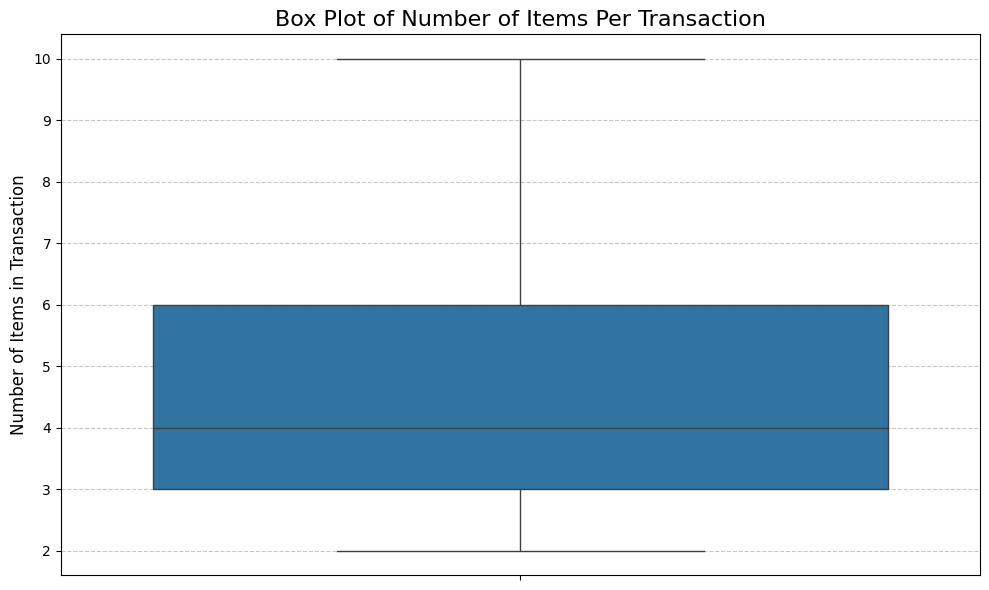

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['count']) # Box plot is usually vertical for single variable

plt.title('Box Plot of Number of Items Per Transaction', fontsize=16)
plt.ylabel('Number of Items in Transaction', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [13]:
pd.DataFrame(data['Items'].value_counts().head(10)) # top 10 items

,count
Items,
"[eggs, french fries]",21
"[cake, french fries]",20
"[chocolate, french fries]",18
"[turkey, eggs]",16
"[burgers, eggs]",14
"[eggs, cookies]",12
"[escalope, pasta]",11
"[mineral water, eggs]",11
"[french fries, cookies]",11


In [14]:
pd.DataFrame(data['Items'].value_counts().tail(10)) # bottom 10 items

,count
Items,
"[burgers, ground beef, mineral water, eggs, whole wheat rice, cooking oil, french fries, cottage cheese, body spray]",1
"[grated cheese, whole wheat rice, bug spray, pasta, green tea]",1
"[mineral water, milk, eggs, brownies, energy drink]",1
"[frozen vegetables, pancakes, low fat yogurt]",1
"[yogurt cake, honey]",1
"[spaghetti, french fries, energy drink]",1
"[ham, shrimp, ground beef, mineral water, avocado, milk, brownies, protein bar]",1
"[mineral water, almonds, cottage cheese, light mayo]",1
"[red wine, candy bars]",1


---

## 🧩 Step 5c: Preprocessing for Market Basket Analysis

We transform the dataset into the required format using TransactionEncoder.


### Create a Transaction encoder for Apriori

In [15]:
TE = TransactionEncoder()
TE

TransactionEncoder()

In [16]:
transaction_item_list = data['Items'].to_list()
te_arr = TE.fit_transform(transaction_item_list)
te_arr

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [17]:
apriori_df = pd.DataFrame(te_arr, columns=TE.columns_)
apriori_df

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5486,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5487,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5488,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5489,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False



---

## ⚖️ Step 6: Apply Apriori Algorithm

We apply the Apriori algorithm to identify frequent itemsets. <br />
Setting a initially low support threshold value as 0.015


In [18]:
frequent_itemsets = apriori(apriori_df, min_support=0.015, use_colnames=True, max_len=3)


---

## 🔗 Step 7: Generate Association Rules

#### We derive association rules from the frequent itemsets based on support, confidence and lift.


In [19]:
def generate_assoc_rules(freq_itms, metric, threshold):
	assoc_rules = association_rules(freq_itms, metric=metric, min_threshold=threshold).sort_values(by='support', ascending=False).reset_index().drop(['index'],axis=1)
	assoc_rules.index = assoc_rules.index + 1
	return assoc_rules.iloc[:, :7]


---

## 🔗 Step 7a: Generate Association Rule (Support)

We now calculate support by setting the **minimum support threshold** as **0.028** (2.8%).

### Understanding "Support" in Association Rules

In the context of association rules, **`support`** is a fundamental metric that helps you understand the **prevalence** or **popularity** of an itemset or a rule within the entire dataset.

---

### Definition:

* **`Support(A ∪ B)`** or **`Support(A ⟹ B)`**: This is the proportion of all transactions in the dataset that contain **both** the `antecedent` item(s) (A) and the `consequent` item(s) (B) together.
    * Mathematically, it's calculated as:
        $$ \text{Support}(A \cup B) = \frac{\text{Number of transactions containing both A and B}}{\text{Total number of transactions}} $$

---


In [20]:
generate_assoc_rules(frequent_itemsets, 'support', 0.028)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
1,(mineral water),(spaghetti),0.280459,0.200510,0.065015,0.231818,1.156143
2,(spaghetti),(mineral water),0.200510,0.280459,0.065015,0.324251,1.156143
3,(mineral water),(chocolate),0.280459,0.195046,0.063012,0.224675,1.151907
4,(chocolate),(mineral water),0.195046,0.280459,0.063012,0.323063,1.151907
5,(mineral water),(eggs),0.280459,0.212894,0.060463,0.215584,1.012638
6,(eggs),(mineral water),0.212894,0.280459,0.060463,0.284003,1.012638
7,(mineral water),(milk),0.280459,0.148971,0.051903,0.185065,1.242288
8,(milk),(mineral water),0.148971,0.280459,0.051903,0.348411,1.242288
9,(ground beef),(mineral water),0.113823,0.280459,0.045893,0.403200,1.437644
10,(mineral water),(ground beef),0.280459,0.113823,0.045893,0.163636,1.437644



#### ✅ High-Support Itemsets

- **(mineral water) → (spaghetti)**  
  - `Support = 0.065` (i.e., 6.5% of transactions)
  - Indicates frequent co-occurrence.

- **(mineral water) → (chocolate)** and **(chocolate) → (mineral water)**  
  - `Support ≈ 0.063`
  - Strong bidirectional relation with decent frequency.

- **(mineral water) → (eggs)**  
  - `Support ≈ 0.060`
  - Common purchase pair in the dataset.

#### ⚠️ Low-Support Itemsets

- **(cake) → (mineral water)**  
  - `Support ≈ 0.032`
  - Rare co-occurrence; niche pairing.

- **(olive oil) → (mineral water)**  
  - `Support ≈ 0.029`
  - May indicate a specialty or less frequent shopping pattern.

#### 📈 Insights

- **Mineral water** is a frequent item appearing in many rules — indicating it is a commonly purchased product.
- Pairs like **(spaghetti, chocolate)** and **(milk, chocolate)** also show meaningful support, hinting at potential bundle opportunities.
- **Support values** help in filtering out the less relevant or rare itemsets in a transactional dataset.

> 🔍 *Use support to identify which item combinations are worth considering for promotions, bundling, or store layout planning.*



---

## 🔗 Step 7b: Generate Association Rule (Confidence)

We now calculate support by setting the **minimum confidence threshold** as **0.35** (35%).

### Understanding "Confidence" in Association Rules

In the context of association rules, **`confidence`** is a crucial metric that tells you about the **reliability** of the rule. It answers the question: "Given that the antecedent item(s) are present in a transaction, how likely is it that the consequent item(s) will also be present?"

---

### Definition:

* **`Confidence(A ⟹ B)`**: This is the conditional probability that a transaction containing the `antecedent` item(s) (A) will *also* contain the `consequent` item(s) (B).
    * Mathematically, it's calculated as:
        $$ \text{Confidence}(A \implies B) = \frac{\text{Support}(A \cup B)}{\text{Support}(A)} = \frac{\text{Support of (A and B)}}{\text{Support of A}} $$
    * It essentially tells you what percentage of transactions that *include* A also *include* B.

---


In [21]:
generate_assoc_rules(frequent_itemsets, 'confidence', 0.35)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
1,(ground beef),(mineral water),0.113823,0.280459,0.045893,0.403200,1.437644
2,(ground beef),(spaghetti),0.113823,0.200510,0.042251,0.371200,1.851280
3,(olive oil),(mineral water),0.073393,0.280459,0.029685,0.404467,1.442159
4,(soup),(mineral water),0.059188,0.280459,0.026225,0.443077,1.579828
5,(chicken),(mineral water),0.069751,0.280459,0.024950,0.357702,1.275418
6,(cooking oil),(mineral water),0.059916,0.280459,0.022582,0.376900,1.343868
7,(salmon),(mineral water),0.048443,0.280459,0.018576,0.383459,1.367254
8,"(spaghetti, ground beef)",(mineral water),0.042251,0.280459,0.016573,0.392241,1.398570
9,"(ground beef, mineral water)",(spaghetti),0.045893,0.200510,0.016573,0.361111,1.800964
10,"(spaghetti, chocolate)",(mineral water),0.042615,0.280459,0.015480,0.363248,1.295191



#### What Can You Conclude from "Confidence"?

* **Rule Strength/Reliability:** A higher `confidence` value indicates a more reliable rule. For instance, if `Confidence(A ⟹ B)` is 0.8, it means that 80% of the time a customer buys item A, they also buy item B.
* **Predictive Power:** It gives you a direct measure of the rule's predictive power. If you recommend item B to someone buying item A, how confident can you be that they will actually buy B?
* **Actionable Insights:** Rules with high confidence are often good candidates for direct business actions, such as:
    * Placing items next to each other in a store.
    * Recommending items online ("Customers who bought this also bought...").
    * Creating targeted promotions.
* **Context with Support:** While high confidence is good, it's important to consider it alongside `support`. A rule might have 100% confidence, but if its support is extremely low (meaning the antecedent itself is very rare), the rule might only apply to a handful of transactions and thus not be very actionable.

| Rank | Rule                                       | Confidence (%) | Insight                                                              |
| ---- | ------------------------------------------ | -------------- | -------------------------------------------------------------------- |
| 1    | `soup → mineral water`                     | **44.31**      | Strongest confidence; buying *soup* highly suggests *mineral water*. |
| 2    | `olive oil → mineral water`                | 40.45          | Common co-purchase with oil; potential for bundling.                 |
| 3    | `ground beef → mineral water`              | 40.32          | High confidence despite broad category; good up-sell opportunity.    |
| 4    | `(spaghetti, ground beef) → mineral water` | 39.22          | Multi-item rule retains high predictive power.                       |
| 5    | `salmon → mineral water`                   | 38.35          | Suggests health-conscious or premium buyers.                         |

📌 Key Takeaways
High Confidence = Reliable Patterns
Rules like soup → mineral water and olive oil → mineral water show strong reliability, meaning customers often buy these together.

Multiple-Item Antecedents Maintain Strength
Even with combinations (e.g., spaghetti + ground beef), confidence remains ~39%, suggesting strong cross-item relationships.

Useful for Product Recommendations
Use these rules in recommendation systems or market basket promotions where predicting the next likely purchase matters.

💼 Business Applications
🛒 Cross-sell Strategy: Recommend mineral water when customers buy high-confidence items like soup or olive oil.

🧃 Store Layout Optimization: Place frequently associated items near each other.

🎯 Targeted Promotions: Offer discounts on mineral water with purchases of high-confidence antecedents.



---

## 🔗 Step 7c: Generate Association Rule (Lift)

We now calculate support by setting the **minimum lift threshold** as **1.5**.

### Understanding "Lift" in Association Rules

Now let's focus on **`lift`**, arguably one of the most insightful metrics in association rule mining, especially for a data science student looking for strong, non-obvious relationships.

---

### Definition:

* **`Lift(A ⟹ B)`**: `Lift` measures how much more likely the `consequent` item(s) (B) are to be purchased when the `antecedent` item(s) (A) are also purchased, relative to the independent probability of purchasing B.
    * Mathematically, it's calculated as:
        $$ \text{Lift}(A \implies B) = \frac{\text{Confidence}(A \implies B)}{\text{Support}(B)} = \frac{\text{Support}(A \cup B)}{\text{Support}(A) \times \text{Support}(B)} $$
---


In [22]:
generate_assoc_rules(frequent_itemsets, 'lift', 1.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
1,(spaghetti),(ground beef),0.200510,0.113823,0.042251,0.210718,1.851280
2,(ground beef),(spaghetti),0.113823,0.200510,0.042251,0.371200,1.851280
3,(eggs),(burgers),0.212894,0.101985,0.033327,0.156544,1.534970
4,(burgers),(eggs),0.101985,0.212894,0.033327,0.326786,1.534970
5,(mineral water),(soup),0.280459,0.059188,0.026225,0.093506,1.579828
6,(soup),(mineral water),0.059188,0.280459,0.026225,0.443077,1.579828
7,(olive oil),(spaghetti),0.073393,0.200510,0.023129,0.315136,1.571675
8,(spaghetti),(olive oil),0.200510,0.073393,0.023129,0.115350,1.571675
9,(milk),(shrimp),0.148971,0.084138,0.018940,0.127139,1.511087
10,(shrimp),(milk),0.084138,0.148971,0.018940,0.225108,1.511087



### What Can You Conclude from "Lift"?

The `lift` value is critical for determining the **strength and true relevance** of an association rule:

* **`Lift > 1` (Positive Association):**
    * This is what you generally look for! It means the `antecedent` (A) and `consequent` (B) are purchased together **more often than would be expected by chance** if their purchases were independent.
    * A higher `lift` value indicates a **stronger positive correlation**. For example, a lift of 2 means that if a customer buys A, they are twice as likely to buy B compared to the general customer population.
    * These rules are highly actionable for **cross-selling** and **recommendation systems**.

* **`Lift = 1` (No Association / Independence):**
    * This means the purchase of the `antecedent` has **no effect** on the purchase of the `consequent`. The items are statistically independent.
    * The probability of buying B is the same whether or not A is bought.

* **`Lift < 1` (Negative Association):**
    * This indicates a **negative correlation**. The items are purchased together *less often* than expected.
    * This might suggest that buying one item makes the purchase of the other less likely (e.g., people buying disposable razors are less likely to buy electric razors).
<br /><br />
---

### 📊 Key Rule Insights from the Dataset

From the top rules (e.g., `df_rules.sort_values(by="lift", ascending=False)`), you can draw:

#### 🔥 Strongest Rules:

- **(herb & pepper) → (ground beef)** and **(ground beef) → (herb & pepper)**  
  **Lift ≈ 2.69**  
  → Very strong mutual pairing — commonly cooked together.

- **(shrimp) ↔ (frozen vegetables)**  
  **Lift ≈ 1.94**  
  → Ideal candidates for a meal kit or bundled offer.

- **(spaghetti) ↔ (ground beef)**  
  **Lift ≈ 1.85**  
  → Classic Italian dish connection (spaghetti bolognese).

#### 🥫 Other Notable Lifts:

- `(frozen vegetables) → (tomatoes)`  
  **Lift ≈ 1.89**

- `(milk) → (soup)`  
  **Lift ≈ 1.78**

- `(spaghetti, mineral water) → ground beef`  
  **Lift ≈ 2.24**

#### 💡 Actionable Takeaways:

- **Use High-Lift Rules for:**
  - 🛍️ Product Bundling (e.g., beef + seasoning)
  - 🧠 Smart Recommendations (e.g., frozen veggies → shrimp)
  - 🧃 Strategic Placement (e.g., soup next to milk)

- **Avoid Overvaluing Confidence Alone:**
  - Confidence may be high just because the consequent is popular.
  - Lift filters for **genuine co-occurrence patterns**.

<br /><br />


---

<br /><br />

## 🧠 Step 8: Conclusion & Business Insights

### 📌 Key Findings from Market Basket Analysis

The transactional analysis uncovers **clear, data-driven purchasing behaviors** that provide substantial value for decision-making across sales, marketing, and inventory operations.  
<br /><br />

---

### 💡 Strategic Observations

* 🥤 **Mineral Water** emerges as one of the **most frequently purchased items**, appearing both individually and as a **common companion** across many transactions, reflecting its staple status.

* 🍝 Strong complementary associations include:

  * **Ground Beef → Spaghetti** (`lift ≈ 1.85`)  
  * **Herb & Pepper → Ground Beef** (`lift ≈ 2.69`)

  These high lift values highlight **meaningful culinary pairings**, indicating customers tend to purchase these items together for specific meal preparations.

* 🧃 Mineral Water frequently appears in **multi-item baskets** involving products like `olive oil`, `soup`, `chicken`, and combinations like `(spaghetti, ground beef)` — indicating habitual or health-conscious purchasing patterns.

* 🛒 Additional notable pairs with lifts above 1 include:

  * **Shrimp + Frozen Vegetables** (`lift ≈ 1.94`)  
  * **Eggs + Burgers** (`lift ≈ 1.53`)  
  * **Milk + Soup** (`lift ≈ 1.78`)  
  * **Chocolate + Champagne** (`lift ≈ 1.51`)

  These suggest consumer preferences around quick meals, cooking styles, and occasional indulgences.

<br /><br />

---

### 🧠 Business Interpretation & Applications

The discovered associations are **statistically significant** and reveal consistent shopping patterns that open avenues for tactical optimization:

| 🔍 Area                   | 💼 Recommendation                                                                                              |
| ------------------------- | -------------------------------------------------------------------------------------------------------------- |
| **🧺 Cross-Selling**       | Bundle high-lift combinations (e.g., **“Dinner Kit” with Spaghetti + Ground Beef + Mineral Water**)             |
| **📦 Inventory Planning**  | Stock highly associated items together, especially during peak demand periods                                  |
| **🛒 Product Placement**   | Position complementary items nearby (both online and in-store) to **reduce customer search effort**            |
| **🎯 Targeted Marketing**  | Use association rules to tailor promotions (e.g., discounts on `Herb & Pepper` when buying `Ground Beef`)       |

<br />

---

### 🚀 Final Takeaways

* Association rules generated through the **Apriori algorithm** effectively reveal **hidden purchase patterns** and **true item affinities**.  
* The **lift metric** is critical for identifying genuine associations beyond item popularity, enabling focused cross-selling and recommendation strategies.  
* These insights empower businesses to **anticipate customer needs**, **optimize store layout**, and **boost sales** through data-driven decisions.

<br /><br />

---

### 🎯 Next Steps

✅ To enhance the analysis and increase ROI:

* Expand the dataset scope for **broader representativeness**  
* Experiment with **support, confidence, and lift thresholds** to refine rule selection  
* Integrate **time-based patterns** (e.g., daily, weekly, seasonal) to capture contextual purchasing trends  

🔁 Scale analysis with larger and more diverse datasets  

🔧 Tune thresholds for optimal balance between rule quality and quantity  

📅 Incorporate seasonality to tailor promotions and inventory dynamically  

🧭 *Understanding customers’ purchasing habits is not just analytics—it’s a strategic advantage.*

<br />

---
